# 数据处理

In [7]:
# 参考：https://www.kaggle.com/roshansharma/mall-customers-clustering-analysis
import pandas as pd
import numpy as np
import os
from pandas import plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff

In [4]:
df = pd.read_csv('./Mall_Customers.csv')

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
# 检查是否有缺失值

df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [17]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [27]:
df['Annual Income (k$)'].max()

137

# 数据可视化

## 性别分布分析

In [14]:
import plotly.express as px

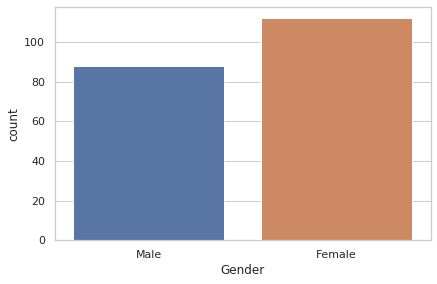

In [25]:
# 对年龄分布进行探索, 发现数据性别还是比较均衡的
sns.set(style = 'whitegrid')
sns.countplot(data=df, x='Gender')

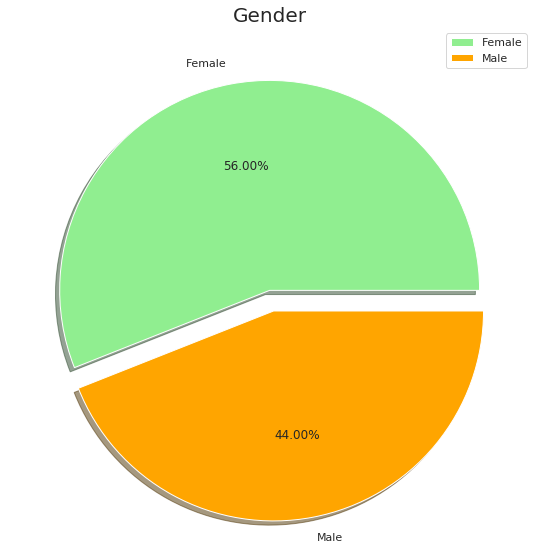

In [31]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

## 年龄分布分析

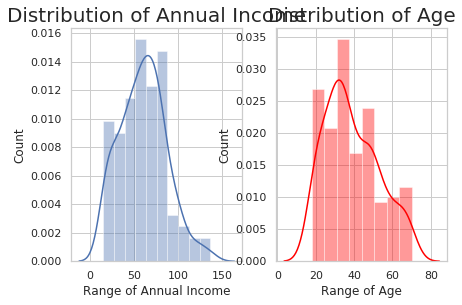

In [13]:
import warnings
warnings.filterwarnings('ignore')
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

In [28]:
# 对于用户的收入情况来说，从上图中可以发现, 很少消费者的年收入可以高于100k美元，大部分人的收入只是在50-75K美元之间
# 同样，我们还可以发现，消费群体中，最低年收入大概是20k美元

In [29]:
# 对于年龄分布来说，通常在商场购物的消费者年龄分布在30-35之间
# 老年人很少来商场进行购物
# 同样，青少年来商场购物的频率还是低于中年群体的

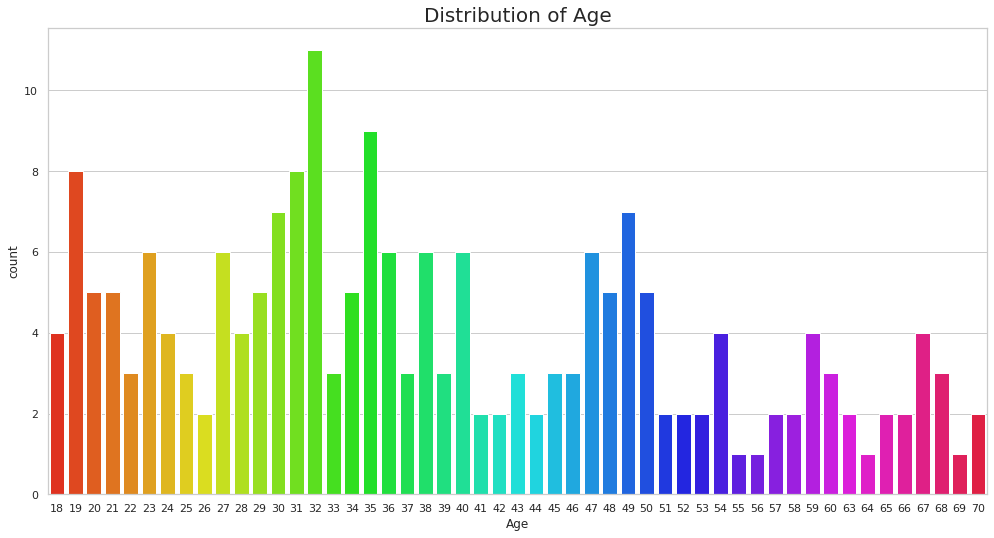

In [33]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

In [34]:
# 这个图表更加细化了年龄，统计了商场中每个年龄的人数情况
# 将年龄细化后，我们不能得出中年群体访问商场的频率会更高
# 我们只能发现，相对于中年群体，老年群体的购物频率，要低于中年群体
# 年龄在55，56，69,的群体，几乎没有购物
# 而年龄在32岁左右的人，到访商场的频率最高

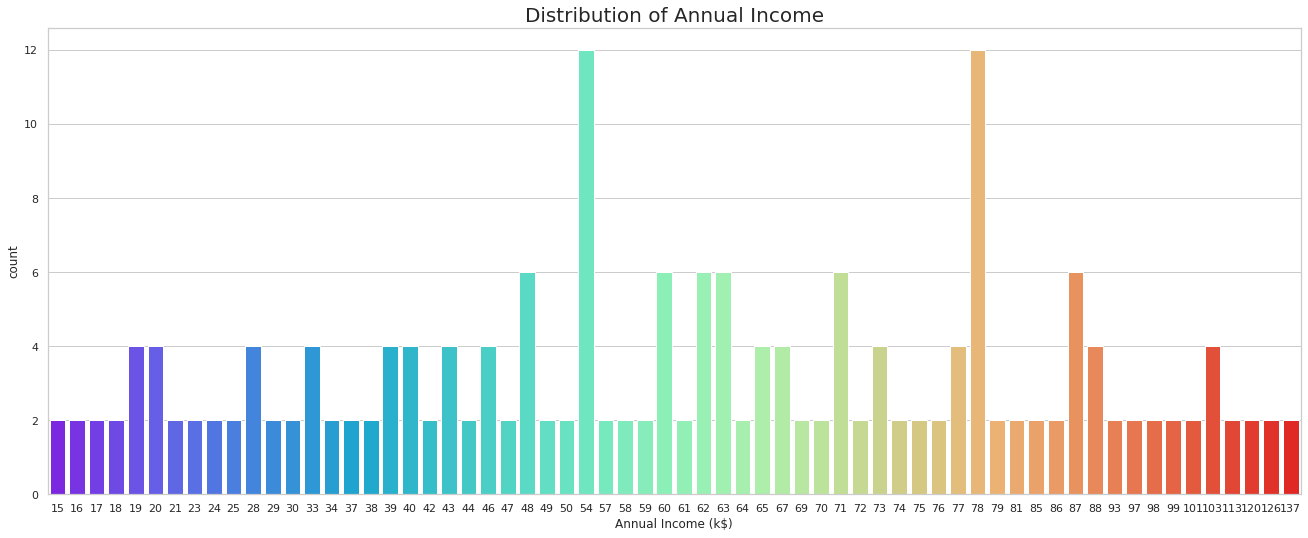

In [36]:
# 收入分布
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(df['Annual Income (k$)'], palette = 'rainbow')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

In [37]:
# 同样，我们细化了年收入分布，这个图能更好地表示消费用户的收入水平
# 我们可以发现，不论用户的年收入是高还是低，访问商场的频率都差不多，只有某些收入到访频率会高一些
# 但是我们能发现年收入在54-78之间的访问频率，要比其他收入区间的频率要高

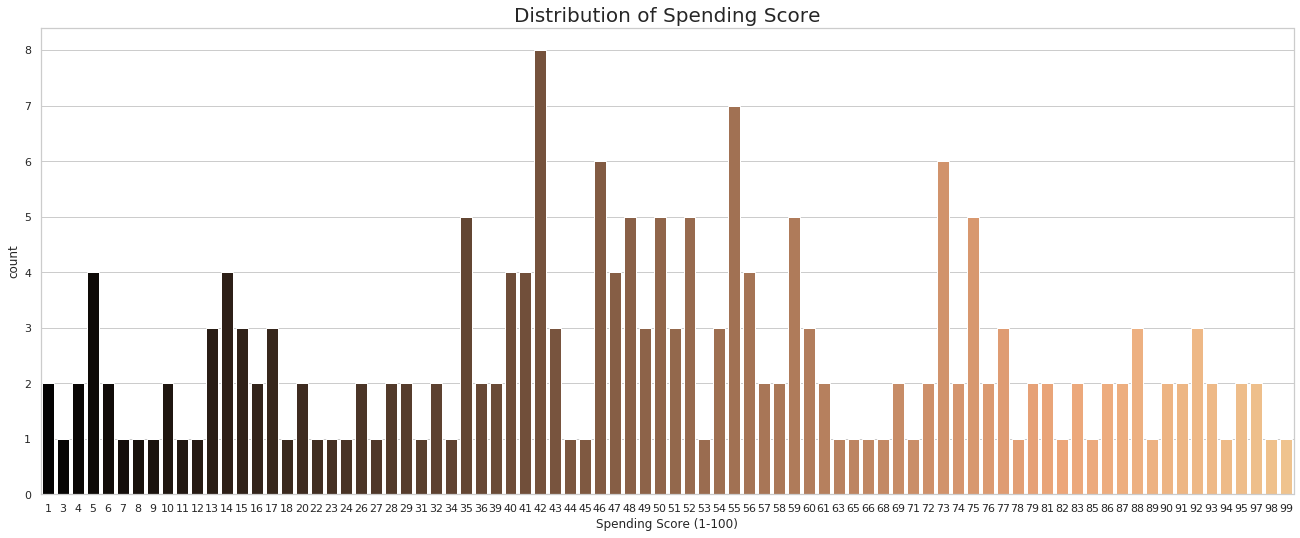

In [39]:
# 消费指数分布图
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(df['Spending Score (1-100)'], palette = 'copper')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

In [40]:
# 这个指数是最重要的一个特征了
# 这个消费分数分布，隐约有点正太分布的趋势
# 从图中我们可以看出，大部分消费用户的消费指数在35-60分左右
# 图像呈现出中间高，两边低的趋势
# 这说明商场的商品种类丰富，能够很好的迎合不同消费能力的用户

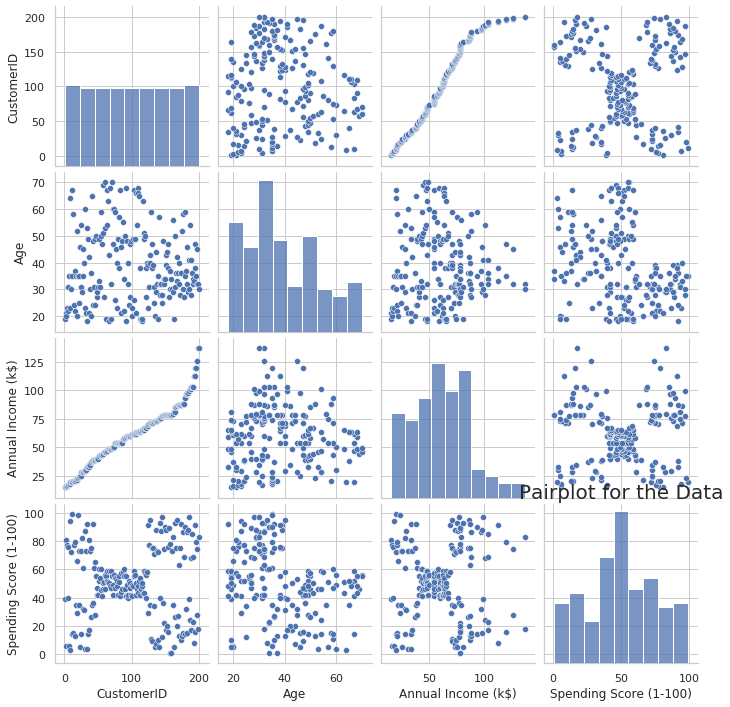

In [42]:
sns.pairplot(df)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

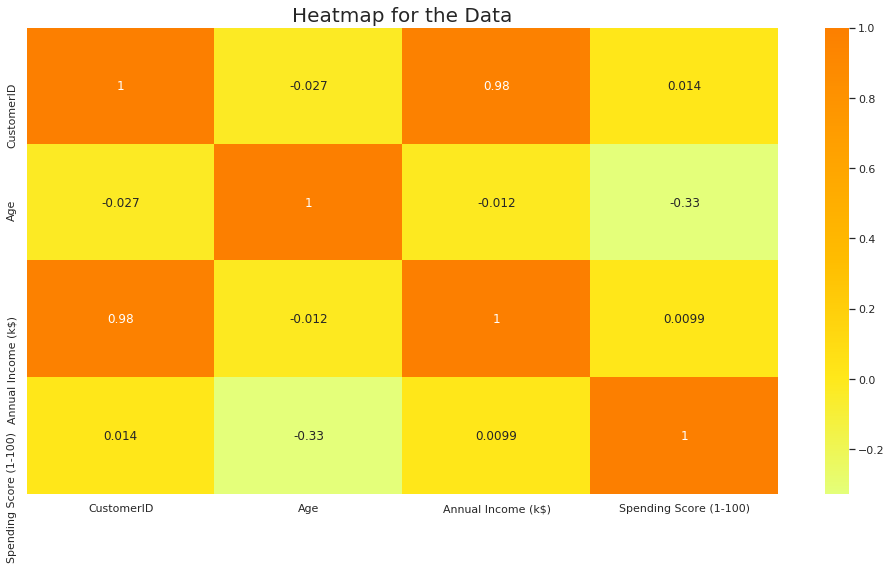

In [43]:
# 绘制相关系数图
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

In [44]:
# 什么是相关系数？
# 数据集中有很多特征，如果只比较两个特征，即一个特征如果变化，另一个特征也跟着变化
# 如果两个特征的变化趋势是一样的，那么相关系数的绝对值就会趋向于1，如果是正1那么呈现出正相关，反之则是负相关
# 如果相关系数趋于0，那么说明两个系数的相关程度不大

In [45]:
# 图中，如果颜色越深，则说明相关系数越高。
# 从图中可以发现，并没有哪些特征的相关性比较好，所以还需要进一步分析

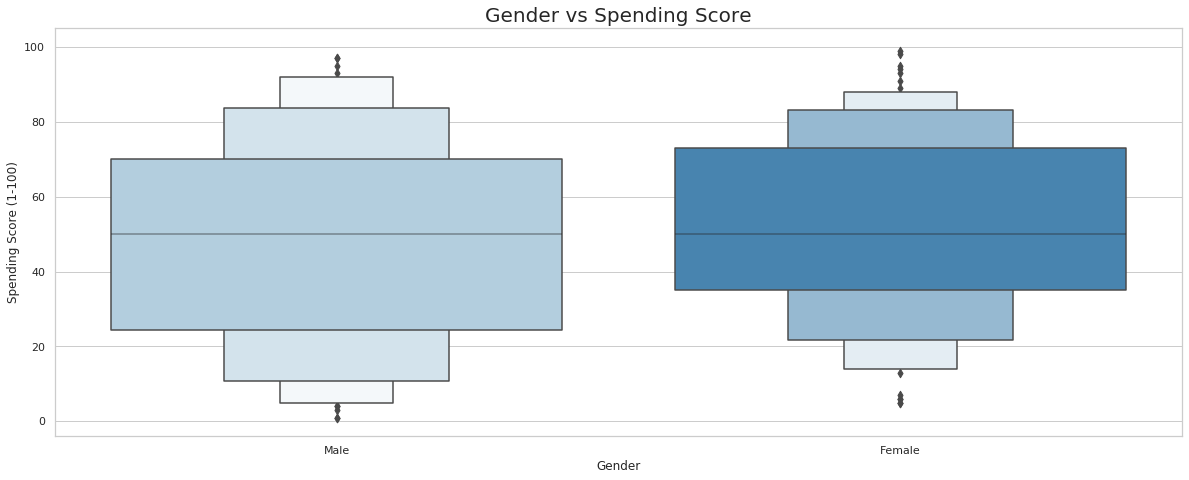

In [47]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(df['Gender'], df['Spending Score (1-100)'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

In [48]:
# 接下来根据不同的性别，分析性别群体的消费指标
# 从图中可以看出，男性群体消费指标主要在25k-70k美元左右
# 然而女性群体消费指标主要在35-75k美元左右
# 由此可以发现，女性在更喜欢在商场中购物

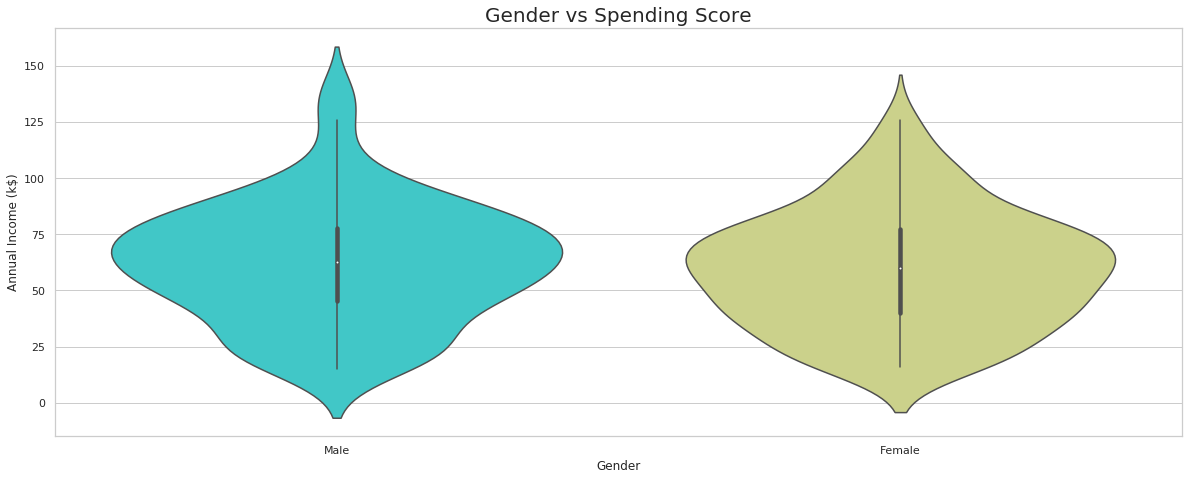

In [50]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(df['Gender'],df['Annual Income (k$)'], palette = 'rainbow')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

In [52]:
# 目前还没看懂这个图是什么意思

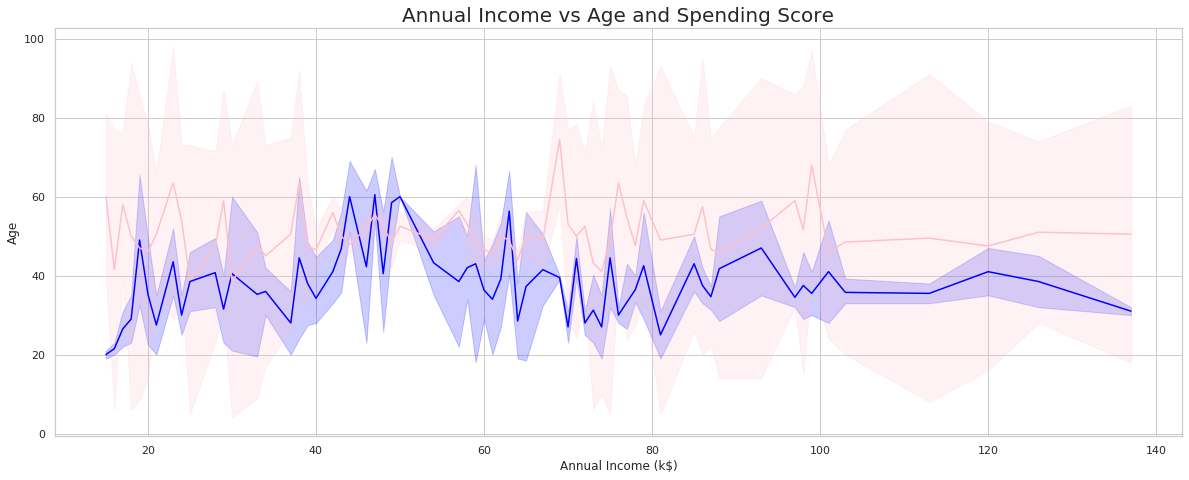

In [51]:
x = df['Annual Income (k$)']
y = df['Age']
z = df['Spending Score (1-100)']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()


In [53]:
# 图中蓝色的线是年收入和年龄的折线图
# 图中粉色折线是年收入和消费指数的折线图
# 通过折线图我们可以看出两者的差异

# 算法分析

## 聚类分析

In [55]:
x = df.iloc[:, [3, 4]].values

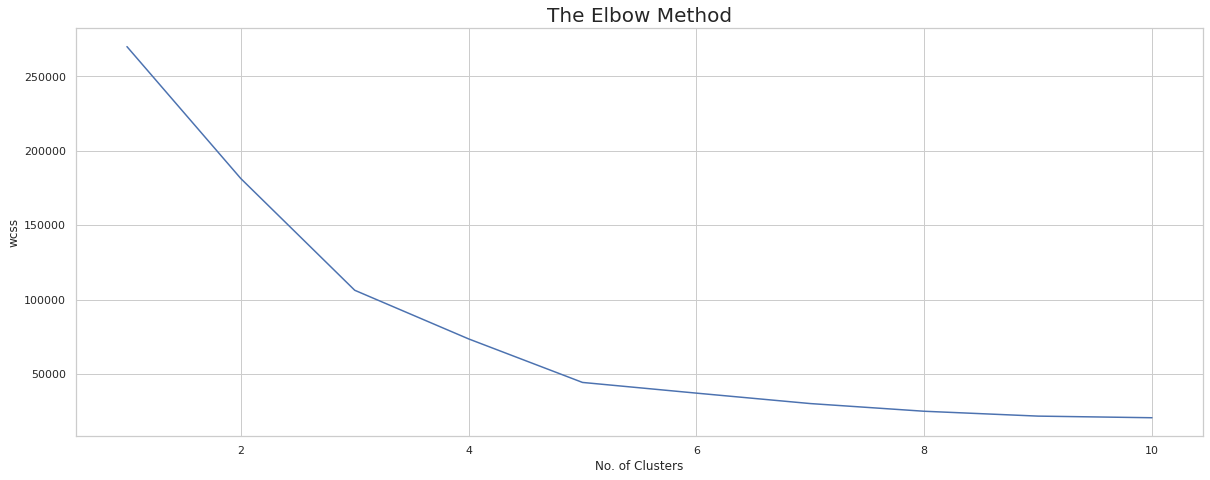

In [57]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

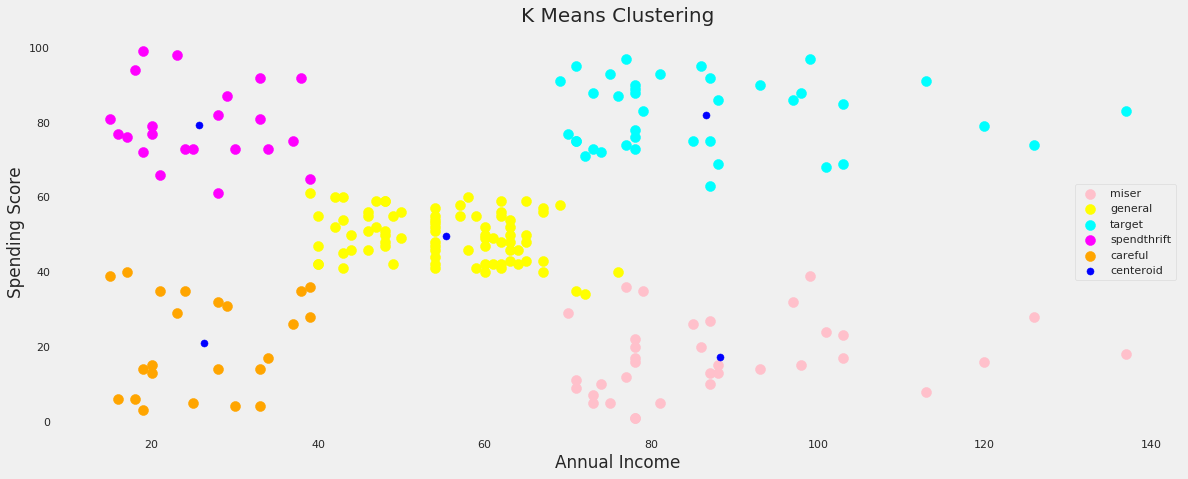

In [59]:
# 聚类结果可视化
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [60]:
# 从聚类结果可以清楚地了解商场中不同用户群的情况
# 从图中可以发现，根据消费群体的年收入和消费指数可以将用户分成5个部分, 这两个参数是将用户区分开来的最好参数
# 为什么是这两个参数呢？因为我们从之前的想关系数看出来的

## 根据年龄进行分类

In [62]:
x = df.iloc[:, [2, 4]].values

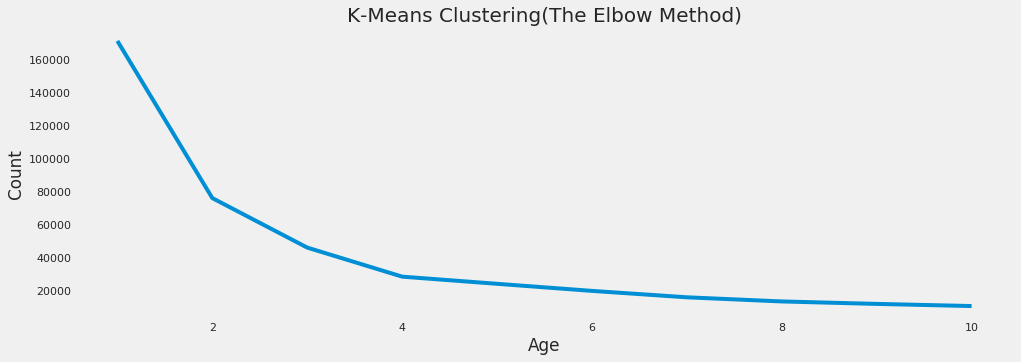

In [63]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

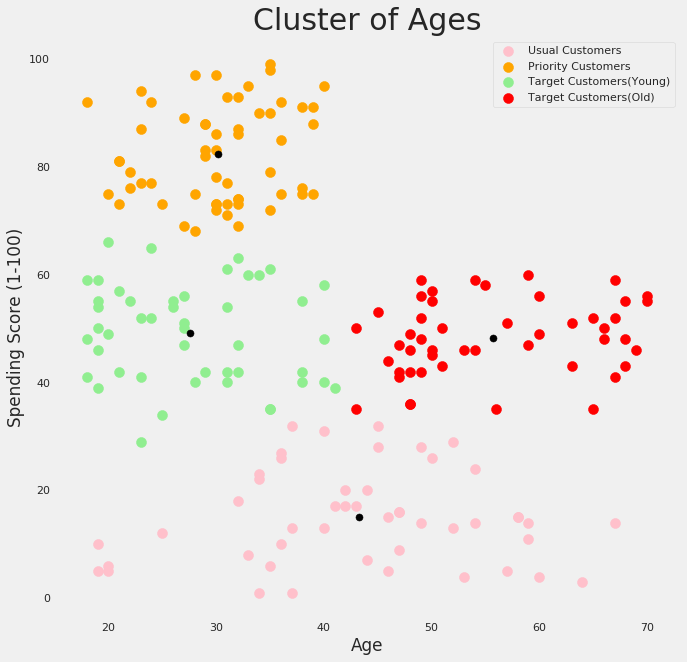

In [64]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

In [65]:
# 同样根据之前的相关系数，我们可以根据年龄和消费指数将用户进行划分
# 通过测试，可以发现分成4个类别是效果比较好的
# 我们可以根据此结论指定不同的营销策略和政策，以优化用户在商城的消费得分